# Exploratory Data Analysis - EDA

## Importing Library

In [1]:
import numpy as np
import time
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Importing database

In [2]:
pwd

'C:\\Users\\Edgard_Cuadra\\OneDrive\\Desktop\\Ironhack\\Projects\\Project_VI-Final_Project'

In [3]:
df_crypto = pd.read_csv (".\output\df_crypto.csv")

In [4]:
df_crypto.sample(3)

,Unnamed: 0,name,coin,supply,mcap,price
726,726,ZKSpace,ZKS,197440000,11499588,0.05824
2213,2213,YVS.Finance,YVS,1325244,87088,0.06571
1576,1576,PumaPay,PMA,31732432231,678994,0.00002


## Creating new calculate fields

Using the current information available be can calculate important information such such as sencibilirty to change of prioce, market capital volum increase. percentage of all the market cap the coin represents.

### Price column with decimals

First we re-calculate price of the currency to get all the decimals, this will help us to make a precise calculation of other calculated fields

In [5]:
df_crypto["price"] = round(df_crypto["mcap"]/df_crypto["supply"],7) 

In [6]:
df_crypto

,Unnamed: 0,name,coin,supply,mcap,price
0,0,Bitcoin,BTC,19133556,386397924400,2.019478e+04
1,1,Ethereum,ETH,122131426,183395206574,1.501622e+03
2,2,Tether,USDT,67549664915,67554553738,1.000072e+00
3,3,USD Coin,USDC,52212562312,52220337195,1.000149e+00
4,4,BNB,BNB,161337261,45732354376,2.834581e+02
...,...,...,...,...,...,...
2691,2691,NFT,NFT,36863404,21,6.000000e-07
2692,2692,CryptoPlanes,CPAN,15600000,12,8.000000e-07
2693,2693,YFFII Finance,YFFII,30000,2,6.670000e-05
2694,2694,Innovative Bioresearch Classic,INNBCL,3570727162,0,0.000000e+00


### New Market Cap and Variation

We are trying to identify those coins that are the lowest price but can increase with a low change in the market capital in accordance to their current supply. in this case we can use rule of three seting the value at 1 and see how much the market cap has to varite in order for it to reach the decired price.

In [7]:
df_crypto["set"] = round(df_crypto["price"]/df_crypto["price"],1) 

In [8]:
df_crypto["new-mcap"] = round(df_crypto["supply"]/df_crypto["set"],2) 

In [9]:
df_crypto["var"]= round((df_crypto["new-mcap"]/df_crypto["mcap"])*100,2)

In [10]:
df_crypto

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var
0,0,Bitcoin,BTC,19133556,386397924400,2.019478e+04,1.0,1.913356e+07,0.000000e+00
1,1,Ethereum,ETH,122131426,183395206574,1.501622e+03,1.0,1.221314e+08,7.000000e-02
2,2,Tether,USDT,67549664915,67554553738,1.000072e+00,1.0,6.754966e+10,9.999000e+01
3,3,USD Coin,USDC,52212562312,52220337195,1.000149e+00,1.0,5.221256e+10,9.999000e+01
4,4,BNB,BNB,161337261,45732354376,2.834581e+02,1.0,1.613373e+08,3.500000e-01
...,...,...,...,...,...,...,...,...,...
2691,2691,NFT,NFT,36863404,21,6.000000e-07,1.0,3.686340e+07,1.755400e+08
2692,2692,CryptoPlanes,CPAN,15600000,12,8.000000e-07,1.0,1.560000e+07,1.300000e+08
2693,2693,YFFII Finance,YFFII,30000,2,6.670000e-05,1.0,3.000000e+04,1.500000e+06
2694,2694,Innovative Bioresearch Classic,INNBCL,3570727162,0,0.000000e+00,NaN,NaN,NaN


since the values have a scientific notation its hard for us to read so in order for it to be more readable ill use panda to diplay format as a float and 5 decimal places.

In [11]:
pd.options.display.float_format = '{:.5f}'.format

In [12]:
df_crypto

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var
0,0,Bitcoin,BTC,19133556,386397924400,20194.77845,1.00000,19133556.00000,0.00000
1,1,Ethereum,ETH,122131426,183395206574,1501.62176,1.00000,122131426.00000,0.07000
2,2,Tether,USDT,67549664915,67554553738,1.00007,1.00000,67549664915.00000,99.99000
3,3,USD Coin,USDC,52212562312,52220337195,1.00015,1.00000,52212562312.00000,99.99000
4,4,BNB,BNB,161337261,45732354376,283.45811,1.00000,161337261.00000,0.35000
...,...,...,...,...,...,...,...,...,...
2691,2691,NFT,NFT,36863404,21,0.00000,1.00000,36863404.00000,175540019.05000
2692,2692,CryptoPlanes,CPAN,15600000,12,0.00000,1.00000,15600000.00000,130000000.00000
2693,2693,YFFII Finance,YFFII,30000,2,0.00007,1.00000,30000.00000,1500000.00000
2694,2694,Innovative Bioresearch Classic,INNBCL,3570727162,0,0.00000,NaN,NaN,NaN


### New Market Cap compared to the current Crypto Marketcap

Calculating the proportion of market capitalization of one coin represents of the total market capitalization of cryptocurrency. in this case it would indicate how much a coin has to get in capital in order to reach the desired value.

In [13]:
df_crypto["mcap"].sum()

1027847361704

In [14]:
df_crypto["prop-newmcap"]=df_crypto["new-mcap"]/df_crypto["mcap"].sum()*100

In [15]:
df_crypto["prop-mcap"]=df_crypto["mcap"]/df_crypto["mcap"].sum()*100

In [16]:
df_crypto.sample(3)

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap
1303,1303,RealFevr,FEVR,1630328172,1476435,0.00091,1.00000,1630328172.00000,110423.29000,0.15862,0.00014
1008,1008,v.systems,VSYS,2637671815,3902183,0.00148,1.00000,2637671815.00000,67594.77000,0.25662,0.00038
361,361,Telos,TLOS,270123444,52313917,0.19367,1.00000,270123444.00000,516.35000,0.02628,0.00509


In [17]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2696 entries, 0 to 2695
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2696 non-null   int64  
 1   name          2696 non-null   object 
 2   coin          2696 non-null   object 
 3   supply        2696 non-null   int64  
 4   mcap          2696 non-null   int64  
 5   price         2696 non-null   float64
 6   set           2663 non-null   float64
 7   new-mcap      2663 non-null   float64
 8   var           2663 non-null   float64
 9   prop-newmcap  2663 non-null   float64
 10  prop-mcap     2696 non-null   float64
dtypes: float64(6), int64(3), object(2)
memory usage: 231.8+ KB


In [18]:
df_crypto.describe()

,Unnamed: 0,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap
count,2696.00000,2696.00000,2696.00000,2696.00000,2663.00000,2663.00000,2663.00000,2663.00000,2696.00000
mean,1347.50000,634579982930541.50000,381249021.40356,96.87337,1.00000,1363500815041.28198,4525369.88097,132.65596,0.03709
std,778.41249,20532796624863764.00000,8477073414.69140,1484.33524,0.00000,27627316486219.05078,50286083.22986,2687.88125,0.82474
min,0.00000,42.00000,0.00000,0.00000,1.00000,42.00000,0.00000,0.00000,0.00000
25%,673.75000,15655669.50000,173124.00000,0.00121,1.00000,15316683.50000,569.14000,0.00149,0.00002
50%,1347.50000,91904664.00000,1309285.00000,0.01319,1.00000,86228944.00000,7099.51000,0.00839,0.00013
75%,2021.25000,700500000.00000,14730638.25000,0.16881,1.00000,644520968.50000,74426.38000,0.06271,0.00143
max,2695.00000,981846777310948352.00000,386397924400.00000,40437.00000,1.00000,937418500000000.00000,1399434150.85000,91202.11180,37.59293


## Filtering the Cryptos to Select batch

###  Filtering by price

We need to filter the coins that are currently above the market price of 1USD, so that we can start looking for the coins of our interest which are thos bellow $1 and have to increase little market cap in relation to its supply to have a significant increase of volume.

In [39]:
df_altcoin = df_crypto[df_crypto['price'] <= 1]

In [40]:
df_altcoin.shape

(2359, 11)

### Filtering by coin Market Capital

We also need to filter all the coins that have not been stablioshed in the marked and have a market cap below $10,000,000.00 this would indicate that the coin has some interest because the have more than 10M invested in it already and there is some sort of capital investment in them. 

In [41]:
df_altcoin = df_altcoin[df_altcoin['mcap'] >= 1000000]

In [42]:
df_altcoin

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap
6,6,XRP,XRP,49537223666,16658999780,0.33629,1.00000,49537223666.00000,297.36000,4.81951,1.62077
7,7,Cardano,ADA,33739028516,15113787024,0.44796,1.00000,33739028516.00000,223.23000,3.28249,1.47043
9,9,Dogecoin,DOGE,132670764300,8470778746,0.06385,1.00000,132670764300.00000,1566.22000,12.90763,0.82413
12,12,Polygon,MATIC,8482124683,6860373921,0.80880,1.00000,8482124683.00000,123.64000,0.82523,0.66745
13,13,Shiba Inu,SHIB,549063278876302,6751681525,0.00001,1.00000,549063278876302.00000,8132244.94000,53418.75645,0.65688
...,...,...,...,...,...,...,...,...,...,...,...
1437,1437,Conceal,CCX,13538402,1012704,0.07480,1.00000,13538402.00000,1336.86000,0.00132,0.00010
1438,1438,Fear,FEAR,6532157,1009808,0.15459,1.00000,6532157.00000,646.87000,0.00064,0.00010
1439,1439,Mist,MIST,56357088,1008149,0.01789,1.00000,56357088.00000,5590.15000,0.00548,0.00010
1440,1440,ShopNEXT,NEXT,189813409,1007357,0.00531,1.00000,189813409.00000,18842.72000,0.01847,0.00010


### Potential Earning as reference.

we create a variable called potential, this is the retun the coin will give for every dollar invested "if" the coin is able to reach the the $1 mark

In [43]:
df_altcoin["potential"]=df_altcoin["set"]/df_altcoin["price"]

In [44]:
df_altcoin

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
6,6,XRP,XRP,49537223666,16658999780,0.33629,1.00000,49537223666.00000,297.36000,4.81951,1.62077,2.97360
7,7,Cardano,ADA,33739028516,15113787024,0.44796,1.00000,33739028516.00000,223.23000,3.28249,1.47043,2.23233
9,9,Dogecoin,DOGE,132670764300,8470778746,0.06385,1.00000,132670764300.00000,1566.22000,12.90763,0.82413,15.66217
12,12,Polygon,MATIC,8482124683,6860373921,0.80880,1.00000,8482124683.00000,123.64000,0.82523,0.66745,1.23639
13,13,Shiba Inu,SHIB,549063278876302,6751681525,0.00001,1.00000,549063278876302.00000,8132244.94000,53418.75645,0.65688,81300.81301
...,...,...,...,...,...,...,...,...,...,...,...,...
1437,1437,Conceal,CCX,13538402,1012704,0.07480,1.00000,13538402.00000,1336.86000,0.00132,0.00010,13.36857
1438,1438,Fear,FEAR,6532157,1009808,0.15459,1.00000,6532157.00000,646.87000,0.00064,0.00010,6.46871
1439,1439,Mist,MIST,56357088,1008149,0.01789,1.00000,56357088.00000,5590.15000,0.00548,0.00010,55.90152
1440,1440,ShopNEXT,NEXT,189813409,1007357,0.00531,1.00000,189813409.00000,18842.72000,0.01847,0.00010,188.42682


### Filtering by proportion of the total Market Cap

The column prop-new cap is the proportion of a coin markert cap in relation to the market cap of all coins. in this case its very irrealistic the current market is at 2.3T dollars so a 1% increase requiresa a 23 billion increase of value. right now we are only looking at a range of coins with mcap of 10M - 60000M so this increase is very substancial. so will filter for a 1% increase of overall market capitalization. 

In [53]:
df_altcoin = df_altcoin[df_altcoin['prop-newmcap'] <= 1]

In [54]:
df_altcoin.describe()

,Unnamed: 0,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
count,1021.00000,1021.00000,1021.00000,1021.00000,1021.00000,1021.00000,1021.00000,1021.00000,1021.00000,1021.00000
mean,804.24388,1059188312.65916,56149543.15279,0.15808,1.00000,1059188312.65916,17660.88529,0.10305,0.00546,176.61433
std,389.55956,1974815002.10533,289828809.65998,0.23618,0.00000,1974815002.10533,58555.11888,0.19213,0.02820,585.62554
min,12.00000,1350243.00000,1007357.00000,0.00012,1.00000,1350243.00000,100.01000,0.00013,0.00010,1.00006
25%,484.00000,64021081.00000,2502967.00000,0.01063,1.00000,64021081.00000,513.65000,0.00623,0.00024,5.13649
50%,832.00000,240000000.00000,7541715.00000,0.04870,1.00000,240000000.00000,2053.28000,0.02335,0.00073,20.53278
75%,1142.00000,956157114.00000,30591105.00000,0.19469,1.00000,956157114.00000,9408.97000,0.09303,0.00298,94.08931
max,1440.00000,10000000000.00000,6860373921.00000,0.99994,1.00000,10000000000.00000,824770.33000,0.97291,0.66745,8250.82508


### Filtering by variation of Market Cap

Var is a calculated field created to identify the variation a could will have to increase in proportion to its current market capitalization. this means that in order for it increase to $1 the is a % increase in relation to its current value.

In [55]:
df_altcoin = df_altcoin[df_altcoin['var'] <= 1000]

In [56]:
df_altcoin.describe()

,Unnamed: 0,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
count,387.00000,387.00000,387.00000,387.00000,387.00000,387.00000,387.00000,387.00000,387.00000,387.00000
mean,613.99483,315272538.83721,117115154.30233,0.37485,1.00000,315272538.83721,415.95339,0.03067,0.01139,4.15953
std,373.76894,904025636.76215,461152016.62120,0.26536,0.00000,904025636.76215,251.33123,0.08795,0.04487,2.51331
min,12.00000,1350243.00000,1009808.00000,0.10061,1.00000,1350243.00000,100.01000,0.00013,0.00010,1.00006
25%,293.50000,25050000.00000,6229564.50000,0.16139,1.00000,25050000.00000,194.77000,0.00244,0.00061,1.94773
50%,573.00000,73780484.00000,22926691.00000,0.27700,1.00000,73780484.00000,361.02000,0.00718,0.00223,3.61015
75%,889.50000,258356331.50000,74703337.50000,0.51342,1.00000,258356331.50000,619.61500,0.02514,0.00727,6.19616
max,1438.00000,8617397990.00000,6860373921.00000,0.99994,1.00000,8617397990.00000,993.90000,0.83839,0.66745,9.93900


In [71]:
df_altcoin.sample(5)

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
312,312,Origin Protocol,OGN,388570733,66481244,0.17109,1.00000,388570733.00000,584.48000,0.03780,0.00647,5.84482
242,242,MaidSafeCoin,MAID,452552412,117179441,0.25893,1.00000,452552412.00000,386.20000,0.04403,0.01140,3.86205
494,494,smARTOFGIVING,AOG,73780484,29857106,0.40467,1.00000,73780484.00000,247.11000,0.00718,0.00290,2.47112
604,604,Grid+,GRID,39236491,20214435,0.51519,1.00000,39236491.00000,194.10000,0.00382,0.00197,1.94101
158,158,Ellipsis,EPS,723701572,134908234,0.18641,1.00000,723701572.00000,536.44000,0.07041,0.01313,5.36440


In [60]:
df_altcoin.to_csv(".\\output\\df_altcoin.csv")

### Checking Pupular AltCoins 

checking the ATH of some popular Alcoins and seeing if they are included in the filteres list:
    
    source: https://www.newsbtc.com/news/altcoins-ath-crypto-bitcoin-ethereum/

In [62]:
df_altcoin[df_altcoin['coin'] == "REN"]

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
168,168,Ren,REN,999037500,119316626,0.11943,1.00000,999037500.00000,837.30000,0.09720,0.01161,8.37299


In [65]:
df_altcoin[df_altcoin['coin'] == "CEL"]

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
127,127,Celsius,CEL,238863520,222915617,0.93323,1.00000,238863520.00000,107.15000,0.02324,0.02169,1.07154


In [68]:
df_altcoin[df_altcoin['coin'] == "PNT"]

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
681,681,pNetwork,PNT,58028876,13990401,0.24109,1.00000,58028876.00000,414.78000,0.00565,0.00136,4.14776


In [70]:
df_altcoin[df_altcoin['coin'] == "ALEPH"]

,Unnamed: 0,name,coin,supply,mcap,price,set,new-mcap,var,prop-newmcap,prop-mcap,potential
319,319,Aleph.im,ALEPH,245676229,63972226,0.26039,1.00000,245676229.00000,384.04000,0.02390,0.00622,3.84036


# Visualization of Altcoins

In [75]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

<AxesSubplot:xlabel='price', ylabel='Count'>

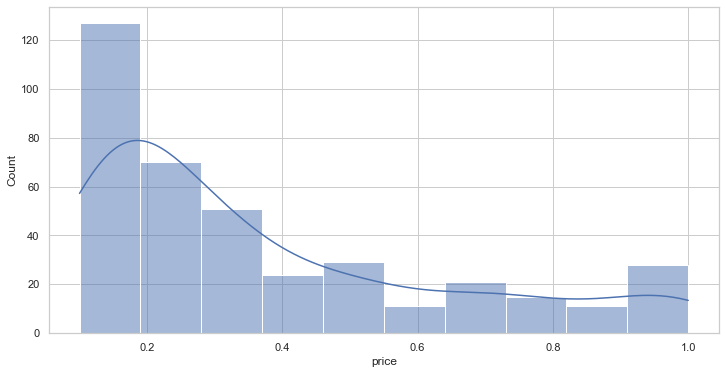

In [80]:
sns.histplot(data=df_altcoin['price'],kde=True)

<AxesSubplot:xlabel='var', ylabel='Count'>

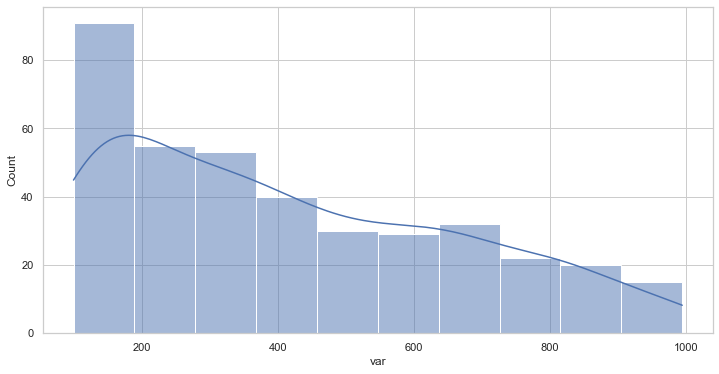

In [81]:
sns.histplot(data=df_altcoin['var'],kde=True)

<AxesSubplot:xlabel='prop-newmcap', ylabel='Count'>

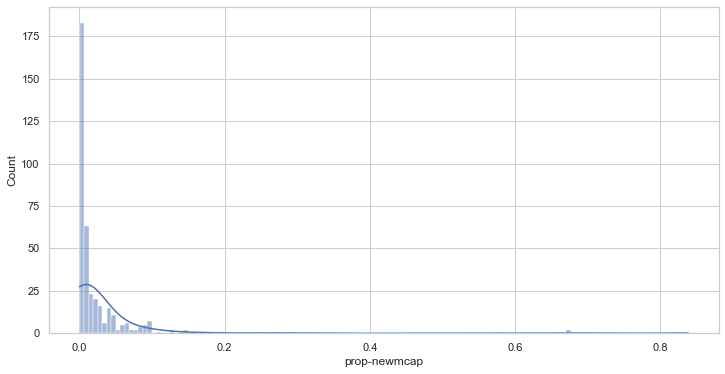

In [82]:
sns.histplot(data=df_altcoin['prop-newmcap'],kde=True)

<AxesSubplot:xlabel='supply', ylabel='Count'>

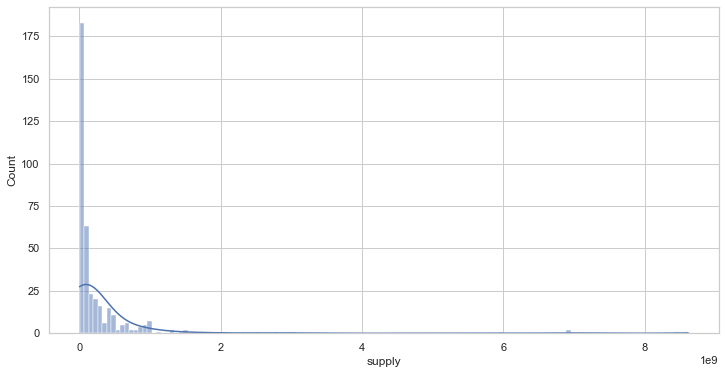

In [83]:
sns.histplot(data=df_altcoin['supply'],kde=True)

<AxesSubplot:xlabel='coin', ylabel='price'>

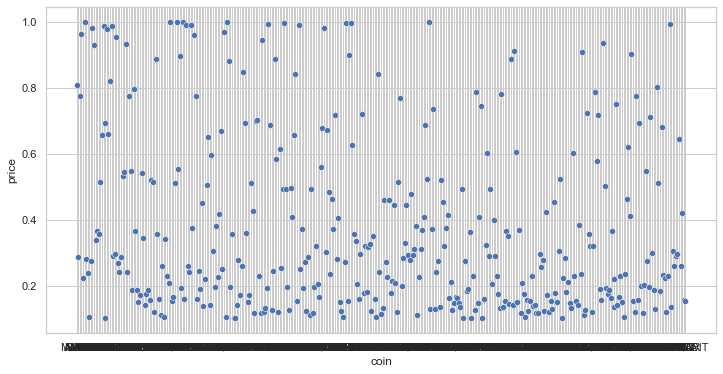

In [90]:
sns.scatterplot(x="coin", y="price", data=df_altcoin)